In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import math
import rospy
from geometry_msgs.msg import PoseStamped
from sensor_msgs.msg import LaserScan
from geometry_msgs.msg import Point, Twist
import tf2_ros as tf
from tf.transformations import euler_from_quaternion
from LinearizationController import LinearizationController

MAX_SIZE = 500

def bresenham_line(x0, y0, x1, y1):
    """Algoritmo de Bresenham para calcular os pixels de uma linha."""
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        points.append((x0, y0))
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
    
    return points

def draw_line(image, pt1, pt2, color=(0, 0, 0), thickness=2):
    cv2.line(image, tuple(pt1), tuple(pt2), color, thickness)

def draw_bottom_lines(image, vertex):
    line = []
    collision_index = None
    bottom_seq = range(vertex[1] + 2, MAX_SIZE, 1)

    for i in bottom_seq:
        line_point = [vertex[0], i]
        line.append(line_point)
    
        # Check for collision
        if (image[i, vertex[0]].all() == 0):
            collision_index = i

            if i != bottom_seq[0]:
                return [vertex[0], collision_index - 1]
            break

    if collision_index is None:
        return [vertex[0], MAX_SIZE]
    return None

def draw_top_lines(image, vertex):
    line = []
    collision_index = None

    top_seq = range(vertex[1] - 2, 0, -1)

    for i in top_seq:
        line_point = [vertex[0], i]
        line.append(line_point)
    
        # Check for collision
        if (image[i, vertex[0]].all() == 0):
            collision_index = i

            if i != top_seq[0]:
                return [vertex[0], collision_index + 1]
            break

    if collision_index is None:
        return [vertex[0], 0]
    return None

height, width = MAX_SIZE, MAX_SIZE
image = np.ones((height, width, 3), dtype=np.uint8) * 255

vertices = [[100, 150], [200, 100], [270, 250],
            [400, 250], [450, 350], [300, 400],
            [50, 300], [150, 250], [200, 350], [100, 400]]

pts1 = np.array([vertices[0], vertices[1], vertices[2]], np.int32).reshape((-1, 1, 2))
pts2 = np.array([vertices[3], vertices[4], vertices[5]], np.int32).reshape((-1, 1, 2))
pts3 = np.array([vertices[6], vertices[7], vertices[8], vertices[9]], np.int32).reshape((-1, 1, 2))

cv2.fillPoly(image, [pts1], (0, 0, 0))
cv2.fillPoly(image, [pts2], (0, 0, 0))
cv2.fillPoly(image, [pts3], (0, 0, 0))

pts = np.array([[0, 0], [0, MAX_SIZE], [MAX_SIZE, MAX_SIZE], [MAX_SIZE, 0]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], isClosed=True, color=(0, 0, 0), thickness=5)

exported_img = cv2.bitwise_not(image)
cv2.imwrite("map.png", exported_img)

sorted_vertices = sorted(vertices, key=lambda x: x[0])

for index, vertex in enumerate(sorted_vertices):

    bottom_point = draw_bottom_lines(image, vertex)
    top_point = draw_top_lines(image, vertex)

    print(bottom_point)

    if (bottom_point != None and top_point != None):
        draw_line(image, vertex, bottom_point)
        draw_line(image, vertex, top_point)

cv2.polylines(image, [pts1], isClosed=True, color=(0, 0, 0), thickness=2)
cv2.polylines(image, [pts2], isClosed=True, color=(0, 0, 0), thickness=2)
cv2.polylines(image, [pts3], isClosed=True, color=(0, 0, 0), thickness=2)

edges = []

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[50, 496]
[100, 274]
[100, 496]
None
None
[200, 496]
[270, 496]
[300, 496]
None
[450, 496]


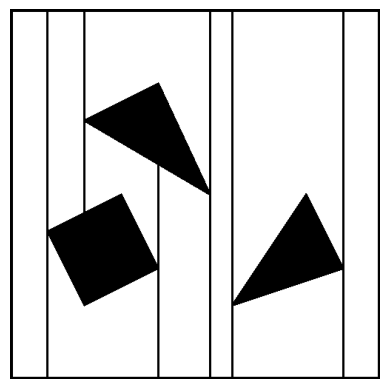

In [32]:
# a = np.array([bresenham_line(100, 100, 200, 50)], np.int32)
# pts = a.reshape((-1, 1, 2))
# cv2.polylines(image_rgb, [pts], isClosed=False, color=(0,200,120), thickness=2)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

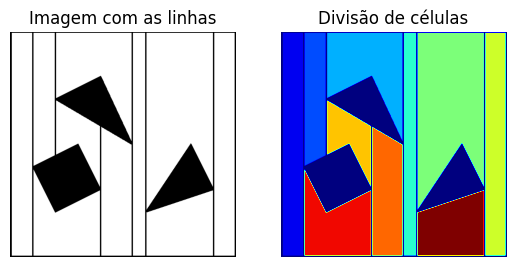

Number of cells found: 10
Cell 1:
(array([  4,   4,   4, ..., 496, 496, 496]), array([ 4,  5,  6, ..., 46, 47, 48]))


Cell 2:
(array([  4,   4,   4, ..., 296, 297, 297]), array([52, 53, 54, ..., 55, 52, 53]))


Cell 3:
(array([  4,   4,   4, ..., 240, 241, 242]), array([102, 103, 104, ..., 268, 268, 268]))


Cell 4:
(array([  4,   4,   4, ..., 496, 496, 496]), array([272, 273, 274, ..., 296, 297, 298]))


Cell 5:
(array([  4,   4,   4, ..., 392, 393, 394]), array([302, 303, 304, ..., 303, 302, 302]))


Cell 6:
(array([  4,   4,   4, ..., 496, 496, 496]), array([452, 453, 454, ..., 494, 495, 496]))


Cell 7:
(array([154, 154, 155, ..., 341, 342, 343]), array([102, 103, 102, ..., 198, 198, 198]))


Cell 8:
(array([212, 213, 213, ..., 496, 496, 496]), array([202, 202, 203, ..., 266, 267, 268]))


Cell 9:
(array([307, 308, 309, ..., 496, 496, 496]), array([ 52,  52,  52, ..., 196, 197, 198]))


Cell 10:
(array([353, 353, 353, ..., 496, 496, 496]), array([446, 447, 448, ..., 446, 447, 448]

In [33]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
num_labels, labels_im = cv2.connectedComponents(binary)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagem com as linhas')

plt.subplot(1, 2, 2)
plt.imshow(labels_im, cmap='jet')
plt.axis('off')
plt.title('Divisão de células')
plt.show()

print(f"Number of cells found: {num_labels - 1}")
for i in range(1, num_labels):
    print(f"Cell {i}:")
    print(np.where(labels_im == i))
    print("\n")

Cluster 1 - ponto central (x, y): (26, 250)
Cluster 2 - ponto central (x, y): (74, 144)
Cluster 3 - ponto central (x, y): (192, 78)
Cluster 4 - ponto central (x, y): (285, 250)
Cluster 5 - ponto central (x, y): (371, 160)
Cluster 6 - ponto central (x, y): (474, 250)
Cluster 7 - ponto central (x, y): (151, 232)
Cluster 8 - ponto central (x, y): (234, 363)
Cluster 9 - ponto central (x, y): (123, 430)
Cluster 10 - ponto central (x, y): (380, 435)


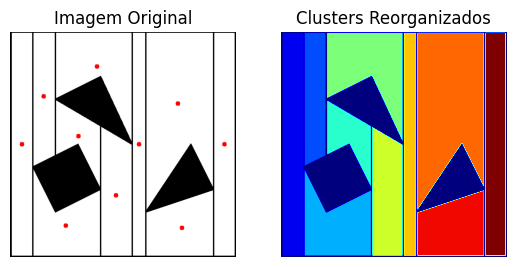

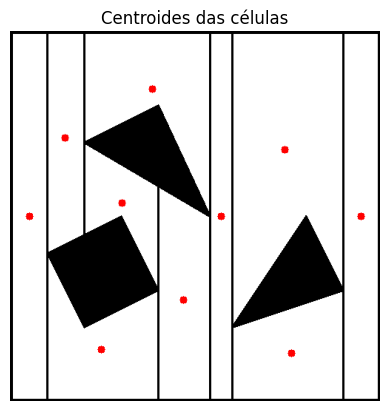

In [34]:
centroids = []
labels_im[labels_im == 0] = 0
num_labels = num_labels - 1

for cluster_index in range(1, num_labels + 1):
    cluster_mask = np.zeros_like(labels_im, dtype=np.uint8)
    cluster_mask[labels_im == cluster_index] = 255
    
    contours, _ = cv2.findContours(cluster_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    center_x = int(np.mean(np.where(labels_im == cluster_index)[1]))
    center_y = int(np.mean(np.where(labels_im == cluster_index)[0]))

    centroids.append((cluster_index, (center_x, center_y)))

    print(f"Cluster {cluster_index} - ponto central (x, y): ({center_x}, {center_y})")

    cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)

centroids.sort(key=lambda x: x[1][0])

new_labels_im = np.zeros_like(labels_im)
for new_id, (old_id, centroid) in enumerate(centroids, start=1):
    new_labels_im[labels_im == old_id] = new_id

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(new_labels_im, cmap='jet')
plt.axis('off')
plt.title('Clusters Reorganizados')
plt.show()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Centroides das células')
plt.show()

4
8
14
20
17
6
4
16
10
4


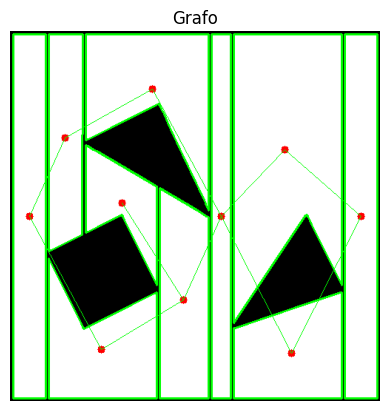

In [35]:
def min_distance_between_contours(contour1, contour2):
    min_dist = float('inf')
    for point in contour1:
        dist = cv2.pointPolygonTest(contour2, (int(point[0][0]), int(point[0][1])), True)
        if abs(dist) < min_dist:
            min_dist = abs(dist)
    return min_dist

distance_threshold = 5

contours_list = []
for i in range(1, num_labels + 1):
    cluster_mask = np.zeros_like(new_labels_im, dtype=np.uint8)
    cluster_mask[new_labels_im == i] = 255
    contours, _ = cv2.findContours(cluster_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
    if contours:
        print(len(contours[0]))
        contours_list.append(contours[0])

for i in range(len(contours_list)):
    for j in range(i + 1, len(contours_list)):
        dist = min_distance_between_contours(contours_list[i], contours_list[j])
        if dist < distance_threshold:
            # print(f"Células {i + 1} e {j + 1} são vizinhas. Distância mínima: {dist:.2f}")
            cv2.line(image, centroids[i][1], centroids[j][1], color=(0,255,0), thickness=1)
        else:
            pass
            # print(f"Células {i + 1} e {j + 1} não são vizinhas. Distância mínima: {dist:.2f}")

image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours_list, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Grafo')
plt.show()